In [ ]:
Лабораторна робота №3 Голомозика Кирила МІТ-31

Частина 1: Бінарна класифікація на згенерованому наборі даних

Завдання:

Згенеруйте набір даних для бінарної класифікації за допомогою бібліотеки Scikit-Learn. Набір даних повинен містити дві числові ознаки і два класи. Використовуйте make_classification для генерації даних.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів).
Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та AUC-ROC.
Візуалізуйте результати, включаючи матрицю плутанини та графік ROC-кривої.

Accuracy: 0.9
Precision: 0.9222222222222223
Recall: 0.8645833333333334
F1 Score: 0.89247311827957
ROC AUC Score: 0.8986378205128206


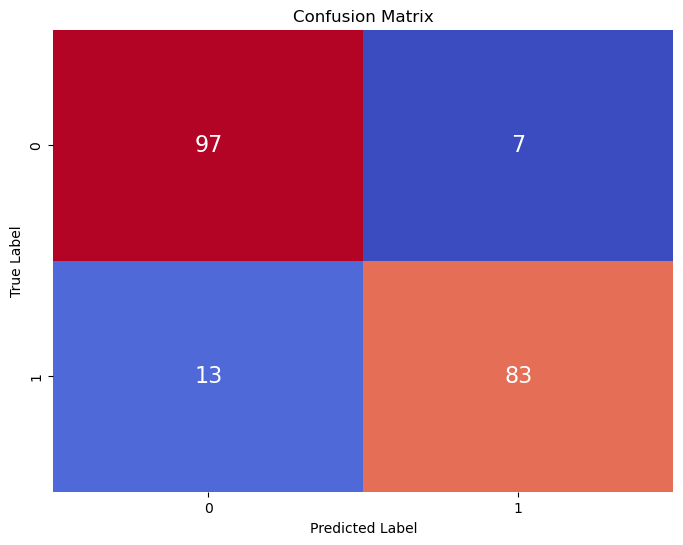

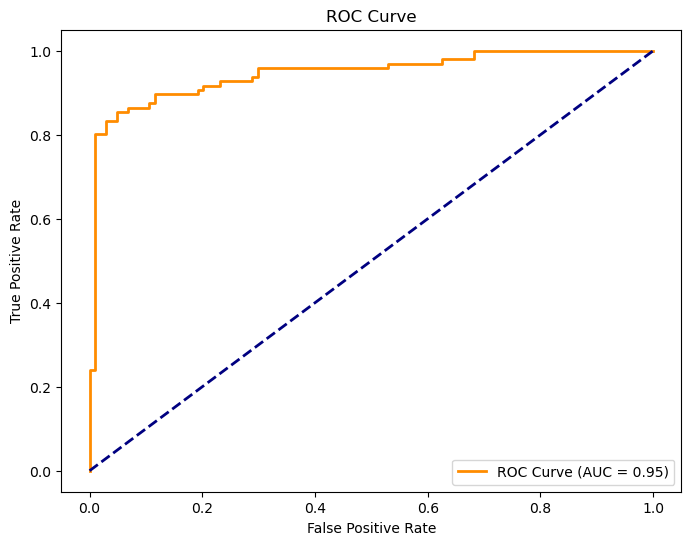

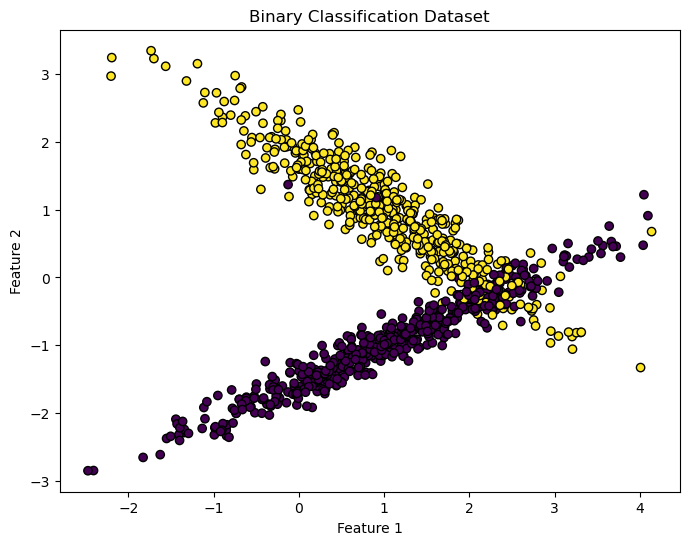

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

# Генерування набору даних для бінарної класифікації
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів
    n_features=2,    # Кількість ознак
    n_classes=2,     # Кількість класів
    n_clusters_per_class=1,  # Кількість кластерів на клас
    n_redundant=0,   # Кількість зайвих ознак
    random_state=42  # Випадковий зерно для відтворюваності
)


# Розділимо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчимо класифікатор (логістична регресія)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Зробимо прогнози на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінка ефективності класифікатора
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Виведемо результати
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


# Отримання матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)

# Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



#Графік ROC-кривої

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Візуалізація набору даних
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
Частина 2: Мультикласова класифікація на згенерованому наборі даних

Завдання:

Згенеруйте набір даних для мультикласової класифікації з трьома і більше класами за допомогою Scikit-Learn. Набір даних повинен містити числові ознаки та багато класів.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатори для мультикласової класифікації.
Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та матриця плутанини.
Порівняйте результати різних класифікаторів.

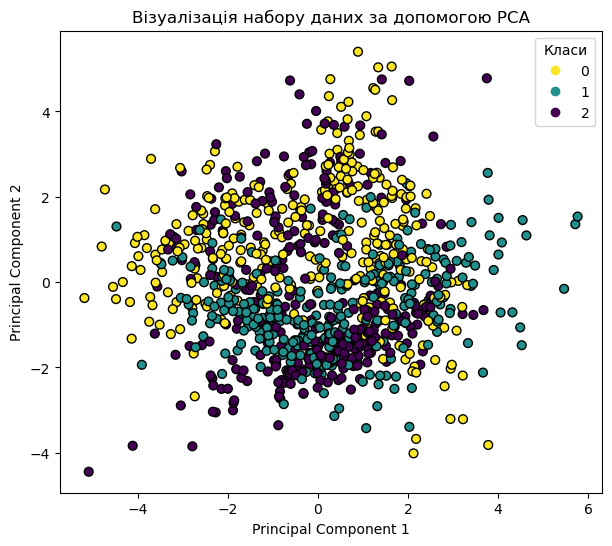

Random Forest Classifier:
Accuracy: 0.83
Precision: 0.8309583127096738
Відгук: 0.83
F1 Score: 0.8293458760855462
Confusion Matrix:
 [[46  4  5]
 [ 3 64  5]
 [ 9  8 56]]

Support Vector Machine Classifier:
Accuracy: 0.87
Precision: 0.8741040687426558
Відгук: 0.87
F1 Score: 0.8694480568121276
Матриця плутання:
 [[43  4  8]
 [ 3 64  5]
 [ 0  6 67]]

Logistic Regression Classifier:
Accuracy: 0.625
Precision: 0.6233875667799903
Відгук: 0.625
F1 Score: 0.6240069904284506
Матриця плутання:
 [[40  7  8]
 [ 2 46 24]
 [16 18 39]]


In [29]:
# Імпорт необхідних бібліотек
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Згенеруємо дані для мультикласової класифікації
X, y = make_classification(n_samples=1000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Створюємо графік
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis_r', edgecolor='k', s=40)
plt.title('Візуалізація набору даних за допомогою PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Класи')
plt.show()

# Розділимо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчимо класифікатори (Random Forest та SVM)

lr_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
classifiers = {
    "Logistic Regression": lr_classifier,
    "Random Forest": rf_classifier,
    "Support Vector Machine": svm_classifier
}

rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Зробимо прогнози на тестовому наборі
y_pred_rf = rf_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)

# Оцінка ефективності класифікаторів
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Матриці плутанини
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


# Виведемо результати
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Відгук:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Відгук:", recall_svm)
print("F1 Score:", f1_svm)
print("Матриця плутання:\n", conf_matrix_svm)

print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Відгук:", recall_lr)
print("F1 Score:", f1_lr)
print("Матриця плутання:\n", conf_matrix_lr)


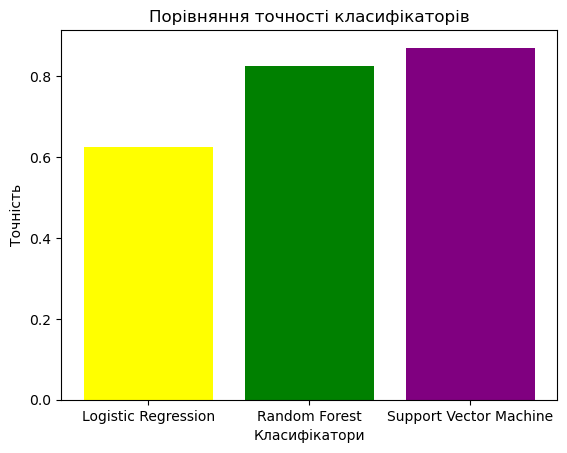

In [25]:
# Виведемо графік порівняння точності класифікаторів
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]

plt.bar(classifiers.keys(), accuracy_scores, color=['yellow', 'green', 'purple'])
plt.xlabel('Класифікатори')
plt.ylabel('Точність')
plt.title('Порівняння точності класифікаторів')
plt.show()

In [ ]:
Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету

Завдання:

Знайдіть реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle (або іншому джерелі даних).
Завантажте цей набір даних і розробіть процедуру для його очищення та підготовки до аналізу.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор для мультилейбл класифікації (наприклад, з використанням багатошарової нейронної мережі).
Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
Проведіть аналіз результатів та вивчіть, які фактори впливають на ефективність моделі в контексті мультилейбл класифікації.

In [39]:
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('always')

data = pd.read_csv('Millionaires.csv')

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

data.fillna(data.mean(), inplace=True)

X = data[['gender', 'age', 'finalWorth', 'status']]
y = data[['country', 'category', 'selfMade']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    print("\nОцінка ефективності для '{}':".format(label))
    print("Accuracy: ", accuracy_score(y_test[label], y_pred[:, i]))
    print("Precision: ", precision_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0))
    print("Recall: ", recall_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0))
    print("F1-Score: ", f1_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
)



Оцінка ефективності для 'country':
Accuracy:  0.2537878787878788
Precision:  0.21145721021539296
Recall:  0.2537878787878788
F1-Score:  0.22885186378298522

Оцінка ефективності для 'category':
Accuracy:  0.1590909090909091
Precision:  0.15433329579528482
Recall:  0.1590909090909091
F1-Score:  0.1553265486922806

Оцінка ефективності для 'selfMade':
Accuracy:  0.7045454545454546
Precision:  0.6877150000456232
Recall:  0.7045454545454546
F1-Score:  0.6930797295488017
